In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [92]:
df = pd.read_csv('nfl_stadiums.csv')
df.head()

,Team,Stadium,Acreage
0,Los Angeles Chargers,SoFi Stadium,298
1,Los Angeles Rams,SoFi Stadium,298
2,Washington Football Team,FedExField,207
3,Las Vegas Raiders,Allegiant Stadium,62
4,Dallas Cowboys,AT&T Stadium,73


/var/folders/m4/bw9c_p2j76z4dr9m73_jbnd00000gn/T/ipykernel_16276/1303201834.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_df['Stadium'], rotation=90)


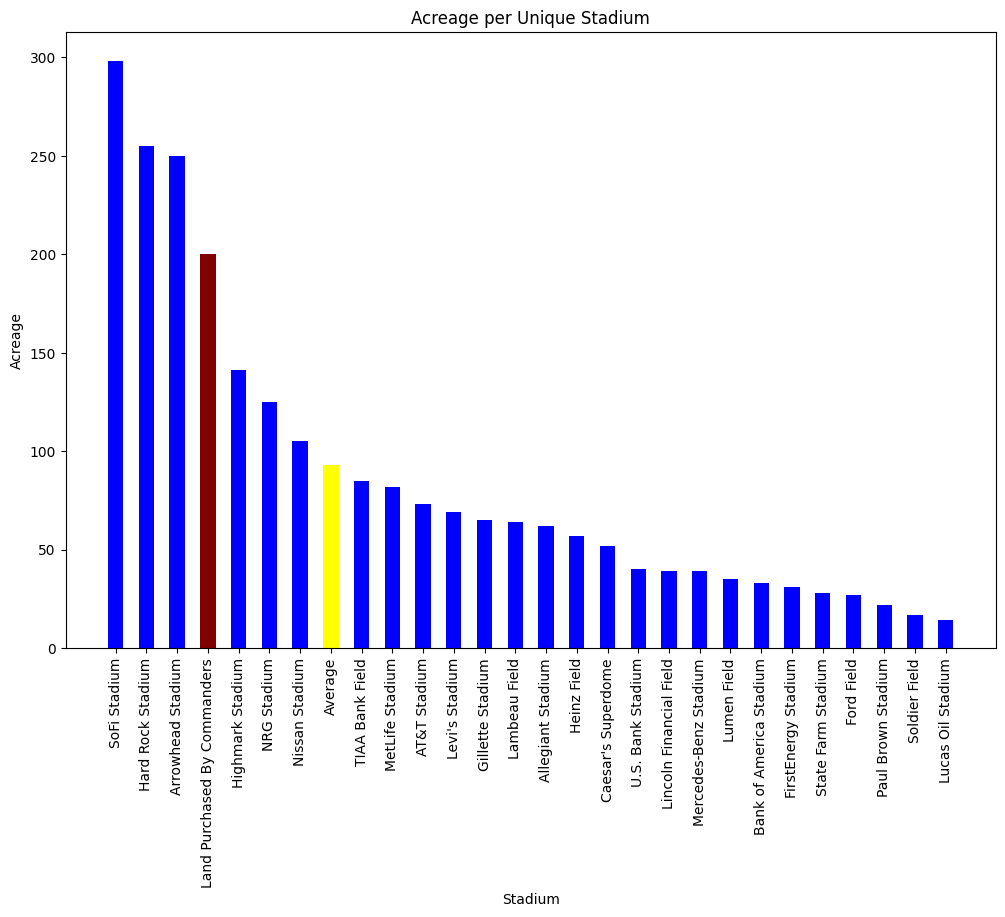

In [93]:

# Calculate the average acreage
average_acreage = df[df['Team'] != 'Washington Commanders']['Acreage'].mean()
df = df[df['Stadium'] != 'FedExField']
df = df[df['Team'] != 'Los Angeles Chargers']
df = df[df['Team'] != 'New York Jets']
# Add a column for the number of stadiums
df['Stadium Count'] = 1

# Group the DataFrame by stadium and team and calculate the total acreage and number of stadiums
grouped_df = df.groupby(['Stadium', 'Team'], as_index=False).agg({'Acreage': 'sum', 'Stadium Count': 'sum'})

# Calculate the average acreage per stadium
grouped_df['Average Acreage'] = grouped_df['Acreage'] / grouped_df['Stadium Count']

# Add a row for the average acreage
average_row = pd.DataFrame({'Stadium': 'Average', 'Acreage': average_acreage, 'Stadium Count': ''}, index=[len(grouped_df)])
grouped_df = pd.concat([grouped_df, average_row], ignore_index=True)

# Add row for new purchase 
new_purchase = pd.DataFrame({'Stadium': 'Land Purchased By Commanders', 'Acreage': 200, 'Stadium Count': ''}, index=[len(grouped_df)])
grouped_df = pd.concat([grouped_df, new_purchase], ignore_index=True)

# Sort the DataFrame by acreage in descending order
sorted_df = grouped_df.sort_values(by=['Acreage'], ascending=False)

# Create a vertical bar chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(sorted_df['Stadium'], sorted_df['Acreage'], color='blue', width=0.5)
ax.bar('Land Purchased By Commanders', 200, color='maroon', width=0.5)
ax.bar('Average', average_acreage, color='yellow', width=0.5)
ax.set_xlabel('Stadium')
ax.set_ylabel('Acreage')
ax.set_title('Acreage per Unique Stadium')
ax.set_xticklabels(sorted_df['Stadium'], rotation=90)
ax.set_yticklabels([int(x) for x in ax.get_yticks()])
plt.show()
